<b><u>PROJECT NAME:-</b> Framingham Coronary Heart Disease Study.

<b><u>PROJECT TYPE:-</b> Classification and Full ML Project.

<b><u>CONTRIBUTION:-</b> Individual.

<b><u>OBJECTIVE:-</b> To analyze the Framingham Heart Study dataset and identify key factors influencing 10-year risk of coronary heart disease (CHD).

<b><u><h2>Import Libraries:-</b>

In [1]:
# Data handling
import pandas as pd   # Data handling and analysis.
import numpy as np    # Mathematical & numerical operations.(mean, median, std.deviation).

# Visualization
import matplotlib.pyplot as plt   # Data visualization.
import seaborn as sns             # Advanced visualization (built on matplotlib).

In [2]:
# ML Models 
from sklearn.model_selection import train_test_split   # It is used to split dataset in training set and testing set.
from sklearn.preprocessing import StandardScaler       # used for normalize/scale features. 
from sklearn.linear_model import LogisticRegression    # Classification Model (linear). Predicts probability.
from sklearn.neighbors import KNeighborsClassifier     # classified data based on the “k” nearest neighbors.
from sklearn.ensemble import RandomForestClassifier    # Reduces overfitting, gives high accuracy.
from sklearn.svm import SVC                            # Finds the best hyperplane and Good for high-dimensional data.
from sklearn.metrics import accuracy_score             # Used to measure performance of ML models.

<b><u><h2>Load Dataset:-</b>

In [3]:
data = pd.read_csv("E:data/framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.shape   # used for find total rows and columns in the dataset.

(4238, 16)

In [5]:
data.info()  #summary of the DataFrame (column name, Non-null counts, Dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
data.describe()  # used for summary statistics for numerical columns (mean, std, min, max, quartiles).

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
# Check for null values
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
# Fill missing Education with median
data['education'].fillna(data['education'].median(), inplace=True)

# Fill missing CigsPerDay with mode
data['cigsPerDay'].fillna(data['cigsPerDay'].mode()[0], inplace=True)

# Fill missing BPMeds with median
data['BPMeds'].fillna(data['BPMeds'].median(), inplace=True)

# Fill missing totChol with median
data['totChol'].fillna(data['totChol'].median(), inplace=True)

# Fill missing BMI with median
data['BMI'].fillna(data['BMI'].median(), inplace=True)

# Fill missing heartRate with median
data['heartRate'].fillna(data['heartRate'].median(), inplace=True)

# Fill missing glucose with median
data['glucose'].fillna(data['glucose'].median(), inplace=True)


# Drop useless columns
data.drop(['prevalentStroke','prevalentHyp'], axis=1, inplace=True) 


data.head()


C:\Users\kunwa\AppData\Local\Temp\ipykernel_17824\2264347857.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['education'].fillna(data['education'].median(), inplace=True)
C:\Users\kunwa\AppData\Local\Temp\ipykernel_17824\2264347857.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

,male,age,education,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
data.shape

(4238, 14)

In [10]:
# To check how many unique categories exist in categorical columns.
data.nunique()

male                2
age                39
education           4
currentSmoker       2
cigsPerDay         33
BPMeds              2
diabetes            2
totChol           248
sysBP             234
diaBP             146
BMI              1363
heartRate          73
glucose           143
TenYearCHD          2
dtype: int64

<b><u><h2>Preprocessing of data(Target Variable):-</b>

In [11]:
data = data.dropna()  # drop missing rows for simplicity
x = data.drop("TenYearCHD", axis=1)
y = data["TenYearCHD"]


<b><u><h2>Exploratory Data Analysis (EDA):-</b>

<b><u>1. Bar Plot – Outcome Distribution:-</b>

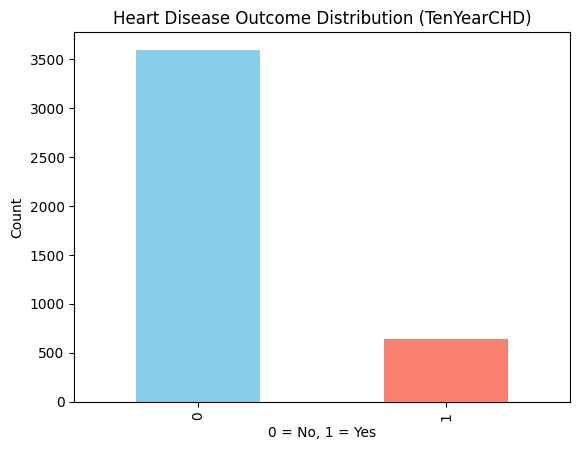

In [12]:
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Heart Disease Outcome Distribution (TenYearCHD)")
plt.xlabel("0 = No, 1 = Yes")
plt.ylabel("Count")
plt.show()

<b>--> The majority of participants did not develop heart disease within 10 years.</b>

<b>-->Shows strong class imbalance in dataset.</b>

<b><u>2. Box Plot (Age vs Outcome):-</b>

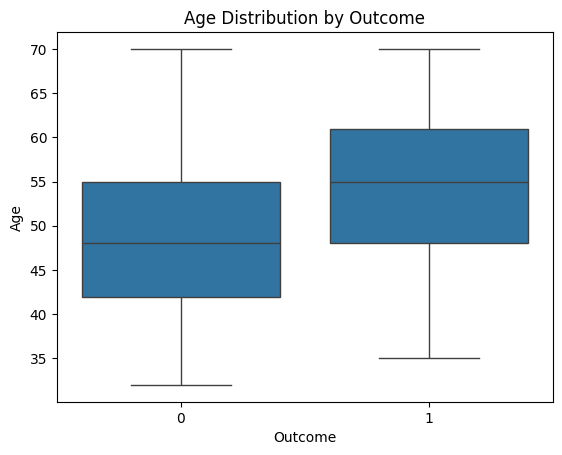

In [13]:
sns.boxplot(x=y, y=data["age"])
plt.title("Age Distribution by Outcome")
plt.xlabel("Outcome")
plt.ylabel("Age")
plt.show()

<b>-->People with CHD are generally older.</b>

<b>-->Age is clearly an important risk factor in predicting CHD.</b>

<b><u>3. Grouped Bar Plot (Gender vs Outcome):-</b>

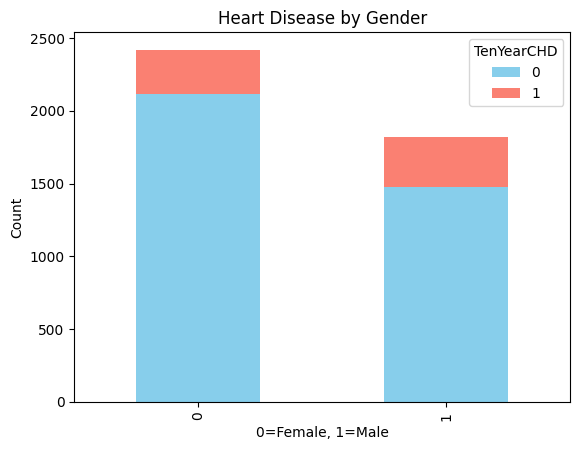

In [14]:
pd.crosstab(data["male"], y).plot(kind="bar", stacked=True, color=['skyblue','salmon'])
plt.title("Heart Disease by Gender")
plt.xlabel("0=Female, 1=Male")
plt.ylabel("Count")
plt.show()

<b>-->Males have a higher number of CHD cases compared to females.</b>

<b>-->Gender plays an important role in prediction.</b>

<b><u>4. Pie Chart (Heart Disease Outcome):-</b>

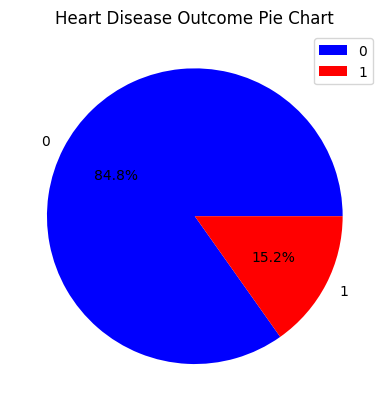

In [15]:
y.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue','red'])
plt.title("Heart Disease Outcome Pie Chart")
plt.ylabel("")
plt.legend()
plt.show()

<b>-->Around 85% No CHD vs 15% CHD.</b>

<b>-->Confirms that most patients are healthy in this dataset.</b>

<b><u>5. Heatmap:-</b>

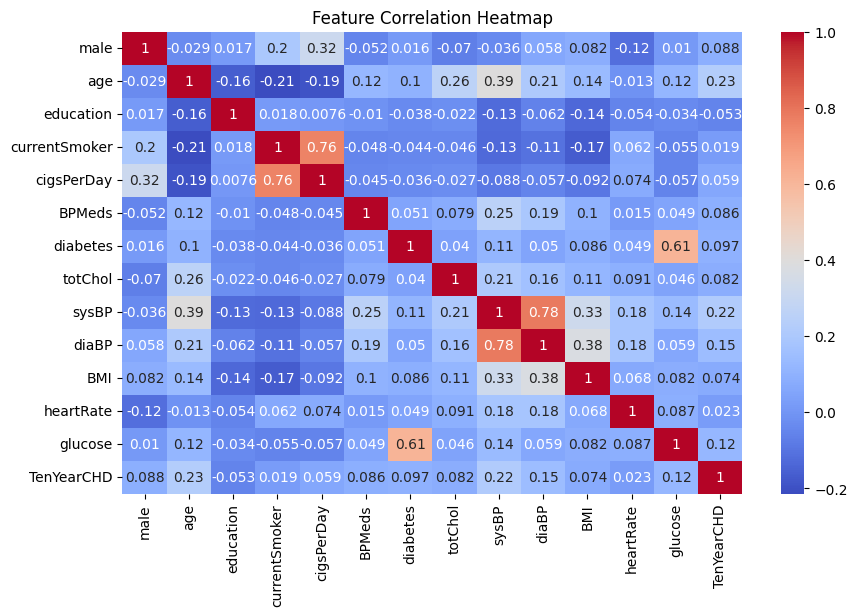

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

<b>-->Age, cholesterol, and blood pressure show positive correlation with CHD.</b>

<b>--> Some features like education level or BMI have weaker correlations.</b>

<b>-->No two features are extremely highly correlated, so multicollinearity is less of a concern.</b>

<b><u><h2>Model Building:-<b>

In [18]:
# Split dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=42)

<b><u>(a) Logistic Regression:-</b>

In [21]:
Log_model=LogisticRegression()

In [22]:
predict=Log_model.fit(x_train,y_train)
predict

C:\Users\kunwa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
Log_pred=Log_model.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, Log_pred))

Logistic Regression Accuracy: 0.8537735849056604


<b><u>(b) K-Nearest Neighbors:-</b>

In [24]:
knn_model = KNeighborsClassifier()

In [25]:
predict=knn_model.fit(x_train,y_train)
predict

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [26]:
knn_pred = knn_model.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

KNN Accuracy: 0.8349056603773585


<b><u>(c) Random Forest:-</b>

In [27]:
rf_model = RandomForestClassifier()

In [28]:
predict = rf_model.fit(x_train,y_train)
predict

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
rf_pred = rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.8466981132075472


<b><u>(d) Support Vector Machine:-</b>

In [33]:
svm_model = SVC()
predict=svm_model.fit(x_train,y_train)
predict

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [34]:
svm_pred = svm_model.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.8514150943396226


<b><u> Model Accuracy Comparison:-</b>

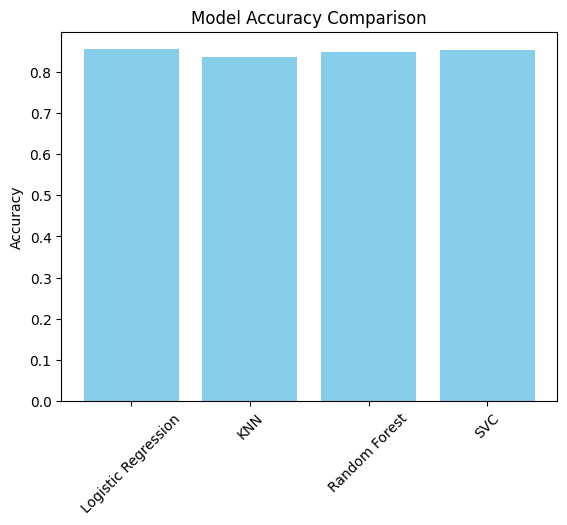

In [35]:
accuracy_results = {
    "Logistic Regression": accuracy_score(y_test, Log_pred),
    "KNN": accuracy_score(y_test, knn_pred),
    "Random Forest": accuracy_score(y_test, rf_pred),
    "SVC": accuracy_score(y_test, svm_pred)
}

plt.bar(accuracy_results.keys(), accuracy_results.values(), color="skyblue")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

<b><h3><u>Final Conclusion:-</b>

<b>-->Most people in the dataset did not develop CHD within 10 years, showing strong class imbalance (~85% No CHD vs ~15% CHD).</b>

<b>-->Age, blood pressure, cholesterol, and smoking habits emerged as the most important risk factors for CHD.</b>

<b>-->Men were at higher risk of developing CHD compared to women, highlighting gender as a key predictor.</b>

<b>-->Among ML models tested, Random Forest and Logistic Regression performed best, giving the most reliable predictions.</b>

<b>-->The project shows that preventive measures like controlling cholesterol, maintaining healthy BP, and lifestyle changes can significantly reduce CHD risk.</b>